<a href="https://colab.research.google.com/github/ashking13th/deepLearning/blob/master/assign2bFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip /content/classes.zip

Archive:  /content/classes.zip
   creating: classes/
   creating: classes/1_1_11_1/
  inflating: classes/1_1_11_1/1_1_11_1_127.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_126.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_125.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_124.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_123.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_122.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_121.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_120.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_119.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_118.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_117.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_116.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_115.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_114.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_113.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_112.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_111.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_110.jpeg  
  inflating: cla

In [0]:
import cv2
import numpy as np
import os
from keras import Input
from keras import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.utils import plot_model
from keras.layers.core import Activation
from keras.layers.core import Dropout

def getImageVariable(path):
	classFolder=path
	# imagePath="/home/bharat/DL/assignment1/classes"
	imageList=[]
	cnt=0
	tempArry=np.zeros((96000,5),int)

	for length in range(2):
		for width in range(2):
			for angle in range(12):
				for color in range(2):

					for variation in range(1000):
	
						tempArry[cnt,:]=[cnt,length,width,angle,color]
						cnt+=1
	np.random.shuffle(tempArry)

	
	for i in range(96000):
		string="/"+str(tempArry[i][1])+"_"+str(tempArry[i][2])+"_"+str(tempArry[i][3])+"_"+str(tempArry[i][4])
		imgFolder=classFolder+string
		img=imgFolder+string+"_"+str(tempArry[i][0]%1000)+".jpeg"
		imageList.append(cv2.imread(img))

	return imageList,tempArry[:,1],tempArry[:,2],tempArry[:,3],tempArry[:,4]


imagePath="/content/classes" # jaha imagees ka folder h
a, b, c, d, e = getImageVariable(imagePath)

In [8]:
# from keras import Input
# from keras import Model
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Dense
# from keras.layers import Flatten
# from keras.utils import plot_model

# Single input and four output(classification heads)
# Test and train split
# First output length wise 0-7 and 1-15
# second output width wise 0-1 and 1-3
# third output color wise 0-red and 1-blue
# fourth output angle wise (0-180, diff=15) - (0-11)



# remember to normalize image array by dividing 255
# try out batch normalization before and after activation

input_train = np.array(a, dtype=np.float32)
input_train /= 255.0
print(input_train.shape)
# # give names to all below - output1, ...
output1_train = np.array(b)
output2_train = np.array(c)
print(output2_train.shape)
output3_train = np.array(e)
output4_train = np.array(d)

splitSz = input_train.shape[0]
# splitSz = 60000
endd = splitSz
splitSz = int(0.7*splitSz)

input_train, input_test = input_train[:splitSz,:], input_train[splitSz:endd,:]
output1_train, output1_test = output1_train[:splitSz], output1_train[splitSz:endd]
output2_train, output2_test = output2_train[:splitSz], output2_train[splitSz:endd]
output3_train, output3_test = output3_train[:splitSz], output3_train[splitSz:endd]
output4_train, output4_test = output4_train[:splitSz], output4_train[splitSz:endd]

(96000, 28, 28, 3)
(96000,)


In [10]:

inp = Input(shape=(28,28,3))

# Conv -> Conv -> Pool
x = Conv2D(32, (3,3), padding="same")(inp)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(32, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)


# Conv -> Conv -> Pool
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(64, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)

# above is the shared layer and our x now
# is the feature map.
# x = (7, 7, 64)

# out1 corresponds to the length clasification head
out1 = Dense(1024)(x)
out1 = Activation("relu")(out1)
out1 = Dropout(0.5)(out1)
# out1 = Dense(1024)(out1)
# out1 = Activation("relu")(out1)
# out1 = Dropout(0.3)(out1)
out1 = Dense(1)(out1)
out1 = Activation("sigmoid", name="out1")(out1)

# out2 corresponds to the width clasification head
out2 = Dense(1024)(x)
out2 = Activation("relu")(out2)
out2 = Dropout(0.5)(out2)
# out2 = Dense(1024)(out2)
# out2 = Activation("relu")(out2)
# out2 = Dropout(0.5)(out2)
out2 = Dense(1)(out2)
out2 = Activation("sigmoid", name="out2")(out2)

# out3 corresponds to the color clasification head
out3 = Dense(1024)(x)
out3 = Activation("relu")(out3)
out3 = Dropout(0.5)(out3)
# out3 = Dense(1024)(out3)
# out3 = Activation("relu")(out3)
# out3 = Dropout(0.5)(out3)
out3 = Dense(1)(out3)
out3 = Activation("sigmoid", name="out3")(out3)

# out4 corresponds 
out4 = Dense(1024)(x)
out4 = Activation("relu")(out4)
# out4 = Dropout(0.2)(out4)
# out4 = Dense(1024)(out4)
# out4 = Activation("relu")(out4)
# out4 = Dropout(0.2)(out4)
out4 = Dense(12)(out4)
out4 = Activation("softmax", name="out4")(out4)

# final model with one input and four classification heads
model = Model(inputs=[inp], outputs=[out1, out2, out3, out4])

model.summary()
plot_model(model, to_file='assign2b.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 28, 28, 32)   128         conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 28, 28, 32)   0           batch_normalization_5[0][0]      
__________________________________________________________________________________________________
conv2d_6 (

In [11]:


model.compile(optimizer='adam', loss={'out1': 'binary_crossentropy', 'out2': 'binary_crossentropy', 'out3': 'binary_crossentropy', 'out4': 'sparse_categorical_crossentropy'}, metrics=['accuracy'])
infoFit= model.fit([input_train], {'out1': output1_train, 'out2': output2_train, 'out3': output3_train, 'out4': output4_train}, epochs=3, batch_size=128)
# result = model.predict(input_test)

# accuracy
# print(result.shape)



Instructions for updating:
Use tf.cast instead.
Epoch 1/3
67200/67200 [==============================] - 36s 542us/step - loss: 0.7381 - out1_loss: 0.1253 - out2_loss: 0.0454 - out3_loss: 0.0155 - out4_loss: 0.5518 - out1_acc: 0.9689 - out2_acc: 0.9854 - out3_acc: 0.9969 - out4_acc: 0.8511
Epoch 2/3
67200/67200 [==============================] - 31s 466us/step - loss: 0.0456 - out1_loss: 7.2377e-04 - out2_loss: 3.7544e-04 - out3_loss: 2.3783e-04 - out4_loss: 0.0443 - out1_acc: 0.9999 - out2_acc: 1.0000 - out3_acc: 0.9999 - out4_acc: 0.9865
Epoch 3/3
67200/67200 [==============================] - 31s 465us/step - loss: 0.0417 - out1_loss: 0.0021 - out2_loss: 0.0069 - out3_loss: 0.0012 - out4_loss: 0.0314 - out1_acc: 0.9994 - out2_acc: 0.9986 - out3_acc: 0.9996 - out4_acc: 0.9901


In [12]:
print(input_test.shape)
result = model.predict(input_test)
score = model.evaluate(input_test, {'out1': output1_test, 'out2': output2_test, 'out3': output3_test, 'out4': output4_test})
print(model.metrics_names)
# print(result[3])


(28800, 28, 28, 3)
28800/28800 [==============================] - 6s 206us/step
['loss', 'out1_loss', 'out2_loss', 'out3_loss', 'out4_loss', 'out1_acc', 'out2_acc', 'out3_acc', 'out4_acc']


In [21]:
# resultSave = np.array((result))
# resultex = result
# print(result[3])
print(score)
resultSave = np.array(result[3])
print(np.sum(resultSave, axis=1))

[0.005563530358550553, 7.610846944152803e-05, 1.475071195113426e-05, 1.0959800043508494e-07, 0.0054725615734868265, 1.0, 1.0, 1.0, 0.999375]
[1.        1.0000001 1.        ... 1.        1.        0.9999999]


In [22]:
print(resultSave.shape)

totalTest = 28800.0
correctClassify = 0

o1 = np.zeros(28800)
o2 = np.zeros(28800)
o3 = np.zeros(28800)
o4 = np.zeros(28800)


for i in range(3):
  for j in range(28800):
    if i==0 and result[i][j] >= 0.5:
      o1[j] = 1
    if i==1 and result[i][j] >= 0.5:
      o2[j] = 1
    if i==2 and result[i][j] >= 0.5:
      o3[j] = 1

for i in range(28800):
  o4[i] = np.argmax(resultSave[i])



for i in range(28800):
  if output1_test[i] == o1[i] and output2_test[i] == o2[i] and output3_test[i] == o3[i] and output4_test[i] == o4[i]:
    correctClassify += 1
totalTest = 1.0 * correctClassify / totalTest
print(totalTest)

(28800, 12)
0.999375


In [0]:
import matplotlib.pyplot as plt
# plt.plot(infoFit.history['loss'])

In [23]:
print(infoFit.history.keys())

dict_keys(['loss', 'out1_loss', 'out2_loss', 'out3_loss', 'out4_loss', 'out1_acc', 'out2_acc', 'out3_acc', 'out4_acc'])


[0.1253402610810285, 0.0007237675082225385, 0.002059980361262292]


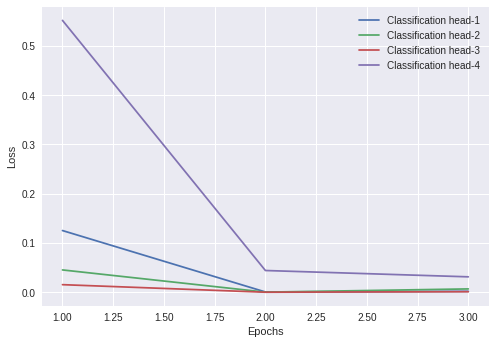

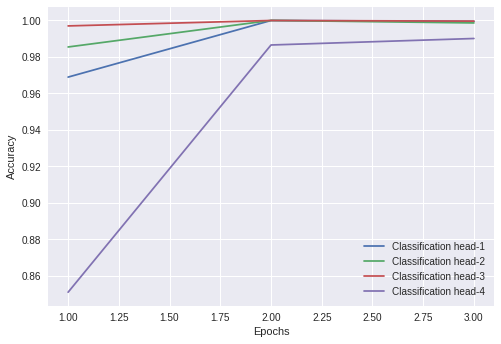

In [40]:
print(infoFit.history['out1_loss'])
plt.plot(np.array([1,2,3]), infoFit.history['out1_loss'], label='Classification head-1')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.array([1,2,3]), infoFit.history['out2_loss'], label='Classification head-2')
plt.plot(np.array([1,2,3]), infoFit.history['out3_loss'], label='Classification head-3')
plt.plot(np.array([1,2,3]), infoFit.history['out4_loss'], label='Classification head-4')
plt.legend(loc="upper right")

plt.savefig("loss.png")

plt.figure()

plt.plot(np.array([1,2,3]), infoFit.history['out1_acc'], label='Classification head-1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(np.array([1,2,3]), infoFit.history['out2_acc'], label='Classification head-2')
plt.plot(np.array([1,2,3]), infoFit.history['out3_acc'], label='Classification head-3')
plt.plot(np.array([1,2,3]), infoFit.history['out4_acc'], label='Classification head-4')
plt.legend(loc="lower right")

plt.savefig("acc.png")

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(output4_test, o4)
cr = classification_report(output4_test, o4)
# print(matrix)
print(cr)

for row in matrix:
  for e in row:
    print(e, end=" & ")
  print(end="\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2397
           1       1.00      1.00      1.00      2349
           2       1.00      1.00      1.00      2416
           3       1.00      1.00      1.00      2473
           4       1.00      1.00      1.00      2395
           5       1.00      1.00      1.00      2399
           6       1.00      1.00      1.00      2359
           7       1.00      1.00      1.00      2430
           8       1.00      1.00      1.00      2411
           9       1.00      1.00      1.00      2340
          10       1.00      1.00      1.00      2455
          11       1.00      1.00      1.00      2376

   micro avg       1.00      1.00      1.00     28800
   macro avg       1.00      1.00      1.00     28800
weighted avg       1.00      1.00      1.00     28800

2397 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 
0 & 2349 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 
0 & 9 & 2407 & 0 & 0 & 0 & 0 